## Selección de características

¿Por qué es necesario seleccionar características? Para algunos, esta idea puede parecer contraintuitiva, pero hay al menos dos razones importantes para deshacerse de las características sin importancia. La primera es evidente para cualquier ingeniero: cuantos más datos, mayor complejidad computacional. Mientras trabajemos con conjuntos de datos de juguete, el tamaño de los datos no es un problema, pero, para sistemas de producción con carga real, cientos de características adicionales serán bastante tangibles. La segunda razón es que algunos algoritmos toman el ruido (características no informativas) como una señal y sobreajustan.

### Enfoques estadísticos

El candidato más obvio para ser eliminado es un rasgo cuyo valor permanece inalterado, es decir, que no contiene información alguna. Si nos basamos en este pensamiento, es razonable decir que las características con baja varianza son peores que las que tienen alta varianza. Por lo tanto, se puede considerar la posibilidad de eliminar características con una varianza inferior a un determinado umbral.

#### Basado en estadísticos no supervisado

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(random_state=2)
x_data_generated.shape

(100, 20)

In [3]:
from sklearn.feature_selection import VarianceThreshold

primer_filtro = VarianceThreshold(.7).fit_transform(x_data_generated)
primer_filtro.shape

(100, 20)

In [4]:
primer_filtro = VarianceThreshold(.8).fit_transform(x_data_generated)
primer_filtro.shape

(100, 15)

In [5]:
primer_filtro = VarianceThreshold(.99).fit_transform(x_data_generated)
primer_filtro.shape

(100, 11)

#### Basado en estadísticos supervisado

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

x_data_kbest = SelectKBest(k=5).fit_transform(x_data_generated, y_data_generated)

In [7]:
x_data_kbest.shape

(100, 5)

In [7]:
logit = LogisticRegression(random_state=42)

In [8]:
coss_val_res = cross_val_score(logit, x_data_generated, y_data_generated, cv=5)  # parecido al kfold pero da una media
np.mean(coss_val_res)

0.8800000000000001

In [9]:
coss_val_res = cross_val_score(logit, x_data_kbest, y_data_generated, cv=5)
np.mean(coss_val_res)

0.86

In [13]:
x_data_varth = VarianceThreshold(.9).fit_transform(x_data_generated)
coss_val_res = cross_val_score(logit, x_data_varth, y_data_generated, cv=5)
np.mean(coss_val_res)

0.89

Podemos ver que las características seleccionadas han mejorado la calidad del clasificador. Por supuesto, este ejemplo es puramente artificial; sin embargo, merece la pena utilizarlo para problemas reales.

#### Supervisado wrapper

In [14]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE # wrapper
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.images.reshape((len(digits.images)), -1)
y = digits.target

In [15]:
X.shape

(1797, 64)

In [16]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)   # selecciona 10 features y elimina  de 1 en 1 cada vez
rfe.fit(X, y)

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=10)

In [19]:
ranking = rfe.ranking_.reshape(digits.images[0].shape) # indica el peso de cada valor en cada imagen. Los 1 es lo que elimina
ranking

array([[55, 41, 22, 14,  1,  8, 25, 42],
       [48, 28, 21, 34,  5, 23, 35, 43],
       [45, 32, 10,  6, 19,  1, 30, 44],
       [46, 36,  1,  9, 11, 29,  1, 50],
       [54, 33, 16, 26, 20,  7,  1, 53],
       [52, 31,  1,  2,  4,  1,  1, 49],
       [47, 38, 17, 27, 15,  1, 13, 39],
       [51, 40,  1, 18, 24, 12,  3, 37]])

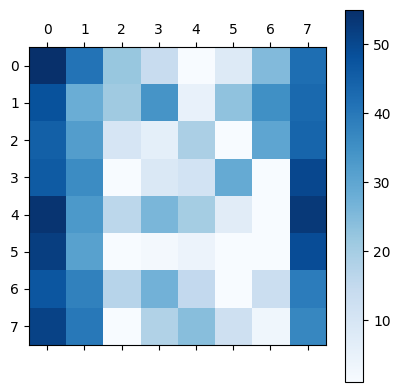

In [17]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)  

plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar();